# Kaggle Titanic Survival Predictions

### Steps
- understanding
    - Read In and Explore the Data
    - Prediction
    - Data Visualization
- preprocessing
    - Cleaning Data
- Data anaylsis
    - Choosing the Best Model
- Creating Submission File

## 1. Import ilbery & Read In and Explore the Data

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [155]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

#Print the `head` of the train and test dataframes
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [156]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [157]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Wells, Miss. Joan",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [158]:
train.describe(include="all")[:1]/891

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1.0,1.0,1.0,1,1,0.801347,1.0,1.0,1,1.0,0.228956,0.997755


In [159]:
train.shape

(891, 12)

In [160]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Data description

- Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
- Categorical Features: Survived, Sex, Embarked, Pclass
- Alphanumeric Features: Ticket, Cabin

> __What are the data types for each feature?__
<br/>Survived: int
<br/>Pclass: int
<br/>Name: string
<br/>Sex: string
<br/>Age: float
<br/>SibSp: int
<br/>Parch: int
<br/>Ticket: string
<br/>Fare: float
<br/>Cabin: string
<br/>Embarked: string

<br/>
- There are total 891 passengers in our training set.
- The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we sould probably attempt to fill these gaps.
- Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll oribably drop these vaules from our dataset

In [161]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 2. Prediction

- Sex : Females are more likely to survive
- Sibsp/Parch : People traveling alon are more likely to survive.
- Age : Yound children are more likely to survive
- Pclass : People of higher socioeconomic class are more likely to survive

## 3. Data visualization

Showing data and find tendency of data

#### Sex Feature
- female & male
- Prediction = Sex : Females are more likely to survive

% of females who survived 74.2038216561
% of males who survived 18.8908145581


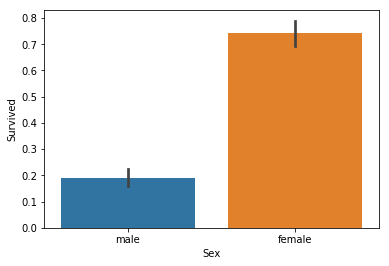

In [162]:
sns.barplot(x="Sex",y="Survived",data=train)
print("% of females who survived", train["Survived"][train["Sex"]=='female'].value_counts(normalize = True)[1]*100)
print("% of males who survived", train["Survived"][train["Sex"]=='male'].value_counts(normalize = True)[1]*100)

#### Sibsp Feature
- SibSp = sibiling or spouses (0,1,2,3,4)
- SibSp : People traveling alon are more likely to survive.

% of SibSp=0 who survived: 34.5394736842
% of SibSp=1 who survived: 53.5885167464
% of SibSp=2 who survived: 46.4285714286
% of SibSp=3 who survived: 25.0
% of SibSp=4 who survived: 16.6666666667


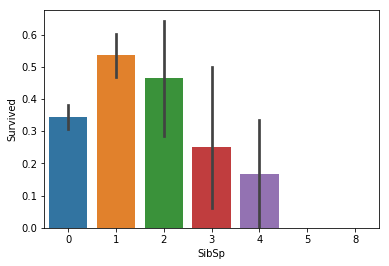

In [163]:
sns.barplot(x="SibSp", y="Survived", data=train)
print("% of SibSp=0 who survived:",train["Survived"][train["SibSp"]==0].value_counts(normalize= True)[1]*100)
print("% of SibSp=1 who survived:",train["Survived"][train["SibSp"]==1].value_counts(normalize= True)[1]*100)
print("% of SibSp=2 who survived:",train["Survived"][train["SibSp"]==2].value_counts(normalize= True)[1]*100)
print("% of SibSp=3 who survived:",train["Survived"][train["SibSp"]==3].value_counts(normalize= True)[1]*100)
print("% of SibSp=4 who survived:",train["Survived"][train["SibSp"]==4].value_counts(normalize= True)[1]*100)

#### Parch Feature
- Parch = Parents and Children (0,1,2,3,4,5)
- Parch : People traveling alon are more likely to survive.

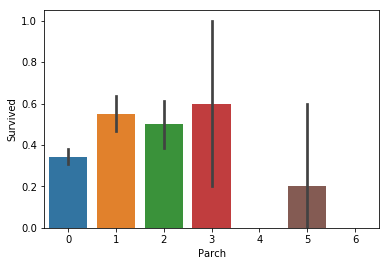

In [164]:
sns.barplot(x="Parch",y="Survived",data=train)

In [165]:
train["Family Size"] =  train["SibSp"] + train["Parch"] + 1
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


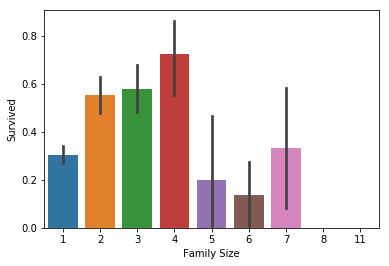

In [166]:
sns.barplot(x="Family Size",y="Survived",data=train)

#### Pclass Feature
- Pclass = socioeconomic class

Percentage of Pclass = 1 who survived 62.962962963
Percentage of Pclass = 2 who survived 47.2826086957
Percentage of Pclass = 3 who survived 24.2362525458


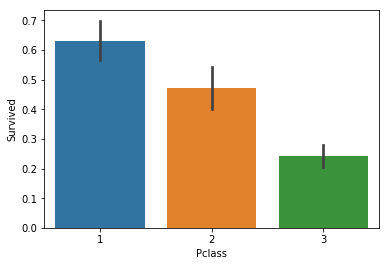

In [167]:
sns.barplot(x="Pclass",y="Survived", data=train)
print("Percentage of Pclass = 1 who survived", train["Survived"][train["Pclass"]==1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived", train["Survived"][train["Pclass"]==2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived", train["Survived"][train["Pclass"]==3].value_counts(normalize = True)[1]*100)

#### Age Feature
- The Age feature is miising approximately 19.8% of its values. I need to fill the blank
- I chose ignore blank data

In [168]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

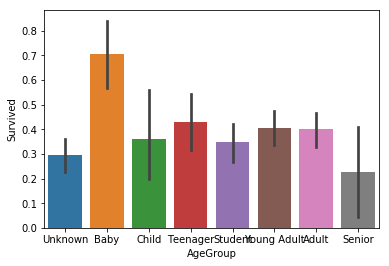

In [169]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

#### Cabin Feature

In [170]:
train["CabinBool"] = train["Cabin"].notnull().astype('int')
test["CabinBool"] = test["Cabin"].notnull().astype('int')

Percentage of CabinBool = 1 who survived: 66.6666666667
Percentage of CabinBool = 0 who survived: 29.9854439592


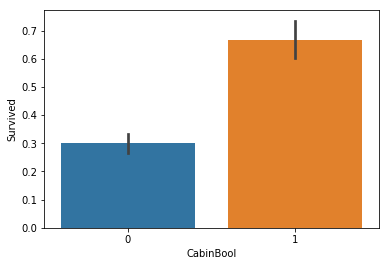

In [171]:
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

## 4. Cleaning Data

Time to clean our data to account for missing values and unnecessary information

In [172]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Sage, Miss. Ada",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


- Total 418 data
- 1 value from the Fare feature is missing
- Dataframe.drop = delete feature

#### Drop feature

In [173]:
train.drop(['Cabin'], axis =1)
test = test.drop(['Cabin'], axis = 1)
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

####  Fill missing feature
- Embarked : 'S' is majority of people / Fill Southampthon
- Age : Predict the missing ages.

In [174]:
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [175]:
train = train.fillna({"Embarked": "S"})

In [176]:
#Extract method accepts a regular expression with at leat one capture group
#[a-zA-Z]: 알파벳 보두, +: 반복을 나타냄, 
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [177]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [178]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family Size,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,2,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,1,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,Young Adult,0,1
